<a href="https://colab.research.google.com/github/rrstats/NY-Bus-Breakdown-Analysis/blob/main/NY_Bus_Breakdown_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import*
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def allchart(one,two, tabletoplot):
    arr = bb.pivot(two, one)[0]
    for i in range(0, len(arr)-1):
        bbx = bb.pivot(one, two)
        bbx = bbx.select(two, arr[i]).sort(arr[i], descending=True)
        bbx.barh(two)
        
    
    #Interchanged the variables
    #bb.pivot(two, one)
#     arr = ['Accident', 'Delayed by School', 'Flat Tire', 'Heavy Traffic',
#        'Late return from Field Trip', 'Mechanical Problem', 'Other',
#        'Problem Run', 'Weather Conditions', 'Won`t Start'],
    

In [ ]:
#Find what's common
#.join('x', 'which table you need to join', 'x')
#.join('x called in 1st table', 'what you need to join', 'x called in second table')

In [ ]:
#For smaller datasets, fewer bins should be sufficient

## Bus Breakdown


In [ ]:
#(6s)
#Original converted to (Occurred_On in 2021) (Number_Of_Students_On_The_Bus 10 to 100)

bb = Table.read_table('Bus_Breakdown_and_Delays.csv')
bb=bb.where('Occurred_On', are.containing('2021'))
bb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
2020-2021,1642643,General Ed AM Run,26681,K2110,Mechanical Problem,"21,10,02,17,27,21,733",01/26/2021 06:24:00 AM,01/26/2021 06:27:00 AM,Brooklyn,SNT BUS INC,16-30 Min,0,Yes,No,No,01/26/2021 06:27:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2020-2021,1642644,Special Ed AM Run,55130,N844,Mechanical Problem,75627,01/26/2021 06:30:00 AM,01/26/2021 06:37:00 AM,Nassau County,"BORO TRANSIT, INC.",16-30 Min,0,No,No,No,01/26/2021 06:37:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2020-2021,1642645,Special Ed AM Run,1833,L319,Flat Tire,13685,01/26/2021 06:37:00 AM,01/26/2021 06:38:00 AM,Brooklyn,B & F SKILLED INC.(B2192),31-45 Min,0,Yes,Yes,No,01/26/2021 06:38:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2020-2021,1642646,Special Ed AM Run,16383,K191,Mechanical Problem,"1,93,46,19,364",01/26/2021 06:29:00 AM,01/26/2021 06:41:00 AM,Brooklyn,"BORO TRANSIT, INC.",0-15 Min,0,Yes,Yes,No,01/26/2021 06:41:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1671963,General Ed AM Run,2665,X2124,Heavy Traffic,10599,10/19/2021 06:50:00 AM,10/19/2021 06:53:00 AM,Bronx,BOBBY`S BUS CO. INC.,nan,0,Yes,Yes,No,10/19/2021 06:53:00 AM,nan,01/01/1900 0:00,Breakdown,School-Age
2021-2022,1673272,General Ed AM Run,472,R1133,Heavy Traffic,"3,10,51,31,706",10/21/2021 07:30:00 AM,10/21/2021 07:53:00 AM,Staten Island,PIONEER TRANSPORTATION CORP,16-30 Min,0,No,No,No,10/21/2021 07:53:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1673291,Special Ed AM Run,1446,N011,Problem Run,2632,10/21/2021 07:56:00 AM,10/21/2021 07:56:00 AM,Manhattan,LEESEL TRANSPORTATION CORP (B2192),46-60 Min,1,Yes,Yes,No,10/21/2021 07:56:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1673376,Special Ed PM Run,1929,N141,Problem Run,6100,10/21/2021 01:30:00 PM,10/21/2021 01:31:00 PM,Manhattan,LEESEL TRANSPORTATION CORP (B2192),46-60 Min,0,Yes,Yes,No,10/21/2021 01:31:00 PM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1673534,Special Ed AM Run,10437,K276,Problem Run,19020,10/22/2021 06:15:00 AM,10/22/2021 06:25:00 AM,Brooklyn,"BORO TRANSIT, INC.",46-60 Min,0,Yes,Yes,No,10/22/2021 06:25:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1673553,Special Ed AM Run,74644,X164,Heavy Traffic,"1,00,37,10,488",10/22/2021 06:25:00 AM,10/22/2021 06:35:00 AM,Bronx,VAN TRANS LLC (B2192),0-15 Min,0,Yes,Yes,No,10/22/2021 06:35:00 AM,nan,01/01/1900 0:00,Running Late,School-Age


## Just look at this number

In [ ]:
# Large number of cases wher Number_Of_Students_On_The_Bus < 10 have been reported

In [ ]:
bb.where('Number_Of_Students_On_The_Bus', are.below(10)).sort('Number_Of_Students_On_The_Bus', descending=True).num_rows

45148

In [ ]:
bb = bb.where('Number_Of_Students_On_The_Bus', are.between(10,100)).sort('Number_Of_Students_On_The_Bus', descending=True)
bb

School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
2021-2022,1668746,General Ed AM Run,1767,Q2844,Problem Run,"2,81,74,28,220",10/07/2021 8:00,10/07/2021 8:18,Queens,JOFAZ TRANSPORTATION INC.,61-90 Min,60,Yes,No,No,10/07/2021 8:18,nan,10/07/2021 8:24,Running Late,School-Age
2021-2022,1674317,General Ed AM Run,91201,Q2215,Heavy Traffic,24385,10/25/2021 07:15:00 AM,10/25/2021 07:19:00 AM,Queens,EMPIRE STATE BUS CORP.,16-30 Min,55,No,No,No,10/25/2021 07:19:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1679289,General Ed AM Run,71810,Q2216,Other,24005,11/05/2021 8:00,11/05/2021 8:09,Queens,EMPIRE STATE BUS CORP.,0-15 Min,55,No,No,No,11/05/2021 8:09,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1687135,General Ed AM Run,784,X2073,Heavy Traffic,"1,11,44,11,685",12/06/2021 8:07,12/06/2021 8:08,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,53,Yes,No,No,12/06/2021 8:08,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1666811,General Ed AM Run,781,X2378,Heavy Traffic,"80,23,08,613",10/01/2021 7:33,10/01/2021 7:35,Bronx,PIONEER TRANSPORTATION CORP,16-30 Min,49,Yes,No,No,10/01/2021 7:35,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1668997,General Ed AM Run,41803,Q2215,Heavy Traffic,24385,10/08/2021 6:45,10/08/2021 6:58,Queens,EMPIRE STATE BUS CORP.,16-30 Min,45,No,No,No,10/08/2021 6:58,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1686574,General Ed AM Run,41804,Q2216,Heavy Traffic,24005,12/03/2021 7:45,12/03/2021 7:50,Queens,EMPIRE STATE BUS CORP.,16-30 Min,44,No,No,No,12/03/2021 7:50,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1680892,General Ed AM Run,6017,X2056,Heavy Traffic,"74,86,07,487",11/10/2021 7:54,11/10/2021 7:55,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,44,Yes,No,No,11/10/2021 7:55,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1676997,General Ed AM Run,784,X2073,Heavy Traffic,"1,11,44,11,685",10/29/2021 08:07:00 AM,10/29/2021 08:08:00 AM,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,43,Yes,No,No,10/29/2021 08:08:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1685851,General Ed AM Run,28764,M1113,Mechanical Problem,2033,12/01/2021 8:15,12/01/2021 8:25,Manhattan,SNT BUS INC,nan,41,Yes,No,No,12/01/2021 8:25,nan,12/01/2021 8:27,Breakdown,School-Age


In [ ]:
bb.column('Schools_Serviced')

array(['2,81,74,28,220', '24385', '24005', '1,11,44,11,685',
       '80,23,08,613', '24385', '24005', '74,86,07,487', '1,11,44,11,685',
       '2033', '74,86,07,487', '8613', '11003', '74,86,07,487',
       '74,86,07,487', '74,86,07,487', '74,86,07,487', '74,86,07,487',
       '74,86,07,487', '75,97,07,688', '7688', '1,13,78,11,727',
       '80,23,08,613', '1,13,78,11,727', '2,90,35,29,095',
       '2,51,63,25,405', '11949', '1,10,68,11,153', '8613', '8345',
       '80,23,08,454', '75,97,07,688', '1,13,78,11,727', '72,33,07,672',
       '74,86,07,487', '1,11,11,11,454', '74,86,07,487',
       '7,02,10,76,84,12,688', '8619', '11648', '3,00,17,30,321', '7688',
       '2,20,78,22,431', '1,10,14,11,169', '8345', '75,97,07,688',
       '72,33,07,672', '2,12,39,21,727', '2776', '72,33,07,672', '24005',
       '1,13,78,11,727', '2,14,62,21,445', '21,44,52,14,62,21,727',
       '29,00,22,90,35,29,095', '72,33,07,672', '2,90,02,29,131',
       '75,97,07,688', '1,10,35,11,065', '1,10,03,11,175',

In [ ]:
import re

def maybeMakeNumber(s):
    """Returns a string 's' into a integer if possible, a float if needed or
    returns it as is."""
    s = s.replace(',', '')

    # handle None, "", 0
    if not s:
        return 0

    #If the string contains any letter, 0 is returned
    if re.search('[a-zA-Z]', s):
      return 0

    try:
        i = int(s)
        if i/i!=1:
          return 'null'
        else:
          return i 
    except ValueError:
        return s

In [ ]:
s_served = list(map(maybeMakeNumber, bb.column('Schools_Serviced')))
print(s_served)

[2817428220, 24385, 24005, 1114411685, 802308613, 24385, 24005, 748607487, 1114411685, 2033, 748607487, 8613, 11003, 748607487, 748607487, 748607487, 748607487, 748607487, 748607487, 759707688, 7688, 1137811727, 802308613, 1137811727, 2903529095, 2516325405, 11949, 1106811153, 8613, 8345, 802308454, 759707688, 1137811727, 723307672, 748607487, 1111111454, 748607487, 70210768412688, 8619, 11648, 3001730321, 7688, 2207822431, 1101411169, 8345, 759707688, 723307672, 2123921727, 2776, 723307672, 24005, 1137811727, 2146221445, 214452146221727, 290022903529095, 723307672, 2900229131, 759707688, 1103511065, 1100311175, 29251, 1137811727, 2219722634, 7233, 8345, 12007, 85470861308619, 702107688, 761507684, 28037280722833200000, 7818, 2223422255, 8345, 8345, 759707688, 861308619, 761207623, 212122123921684, 8345, 0, 1101411169, 2903529095, 8345, 1400714037, 2903529131, 7005072960744900000, 1103511065, 8345, 290022903529095, 8345, 290022903529095, 8345, 761207623, 8345, 114541152911532, 8345, 76

AttributeError: ignored

## Drastically Different Mean and Median

In [ ]:
np.mean(s_served), np.median(s_se rved)

(1.1592610560048956e+32, 205902580.0)

### Further Analysis With the 'Schools_Serviced' Column is not performed due to vague values of mean and median.

In [ ]:
#HeatMap Candidate
#Number of times in the year 2021 that a bus with 10-100 children was delayed for each Boro

bb_delay = bb.pivot('How_Long_Delayed', 'Boro')
bb_delay

Boro,0-15 Min,16-30 Min,31-45 Min,46-60 Min,61-90 Min,nan
All Boroughs,1,0,0,0,0,0
Bronx,211,245,54,24,4,9
Brooklyn,11,140,65,47,31,13
Manhattan,6,9,4,7,2,3
Nassau County,2,8,1,3,0,0
Queens,2,48,22,9,5,10
Staten Island,0,1,0,0,0,0
Westchester,1,0,0,0,2,0


In [ ]:
interval = bb.select('How_Long_Delayed', 'Boro')
interval

How_Long_Delayed,Boro
61-90 Min,Queens
16-30 Min,Queens
0-15 Min,Queens
0-15 Min,Bronx
16-30 Min,Bronx
16-30 Min,Queens
16-30 Min,Queens
0-15 Min,Bronx
0-15 Min,Bronx
nan,Manhattan


In [ ]:
bb10_100 = bb.where('Number_Of_Students_On_The_Bus', are.between(10,100))
bb10_100

School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
2021-2022,1668746,General Ed AM Run,1767,Q2844,Problem Run,"2,81,74,28,220",10/07/2021 8:00,10/07/2021 8:18,Queens,JOFAZ TRANSPORTATION INC.,61-90 Min,60,Yes,No,No,10/07/2021 8:18,nan,10/07/2021 8:24,Running Late,School-Age
2021-2022,1674317,General Ed AM Run,91201,Q2215,Heavy Traffic,24385,10/25/2021 07:15:00 AM,10/25/2021 07:19:00 AM,Queens,EMPIRE STATE BUS CORP.,16-30 Min,55,No,No,No,10/25/2021 07:19:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1679289,General Ed AM Run,71810,Q2216,Other,24005,11/05/2021 8:00,11/05/2021 8:09,Queens,EMPIRE STATE BUS CORP.,0-15 Min,55,No,No,No,11/05/2021 8:09,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1687135,General Ed AM Run,784,X2073,Heavy Traffic,"1,11,44,11,685",12/06/2021 8:07,12/06/2021 8:08,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,53,Yes,No,No,12/06/2021 8:08,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1666811,General Ed AM Run,781,X2378,Heavy Traffic,"80,23,08,613",10/01/2021 7:33,10/01/2021 7:35,Bronx,PIONEER TRANSPORTATION CORP,16-30 Min,49,Yes,No,No,10/01/2021 7:35,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1668997,General Ed AM Run,41803,Q2215,Heavy Traffic,24385,10/08/2021 6:45,10/08/2021 6:58,Queens,EMPIRE STATE BUS CORP.,16-30 Min,45,No,No,No,10/08/2021 6:58,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1686574,General Ed AM Run,41804,Q2216,Heavy Traffic,24005,12/03/2021 7:45,12/03/2021 7:50,Queens,EMPIRE STATE BUS CORP.,16-30 Min,44,No,No,No,12/03/2021 7:50,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1680892,General Ed AM Run,6017,X2056,Heavy Traffic,"74,86,07,487",11/10/2021 7:54,11/10/2021 7:55,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,44,Yes,No,No,11/10/2021 7:55,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1676997,General Ed AM Run,784,X2073,Heavy Traffic,"1,11,44,11,685",10/29/2021 08:07:00 AM,10/29/2021 08:08:00 AM,Bronx,PIONEER TRANSPORTATION CORP,0-15 Min,43,Yes,No,No,10/29/2021 08:08:00 AM,nan,01/01/1900 0:00,Running Late,School-Age
2021-2022,1685851,General Ed AM Run,28764,M1113,Mechanical Problem,2033,12/01/2021 8:15,12/01/2021 8:25,Manhattan,SNT BUS INC,nan,41,Yes,No,No,12/01/2021 8:25,nan,12/01/2021 8:27,Breakdown,School-Age


In [ ]:
time = bb10_100.group(['How_Long_Delayed', 'Boro'])
time.sort('count', descending=True)

How_Long_Delayed,Boro,count
16-30 Min,Bronx,245
0-15 Min,Bronx,211
16-30 Min,Brooklyn,140
31-45 Min,Brooklyn,65
31-45 Min,Bronx,54
16-30 Min,Queens,48
46-60 Min,Brooklyn,47
61-90 Min,Brooklyn,31
46-60 Min,Bronx,24
31-45 Min,Queens,22


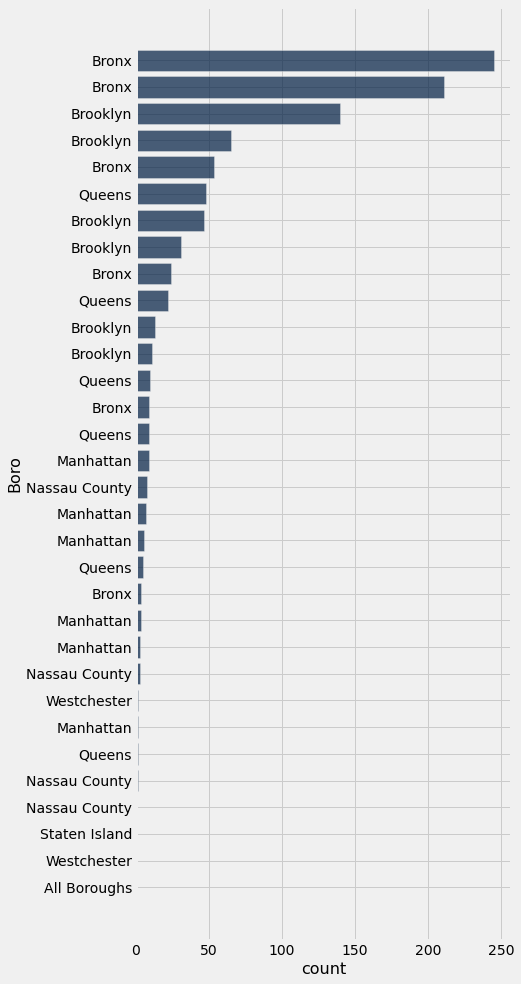

In [ ]:
time.sort('count', descending=True).drop('How_Long_Delayed').barh('Boro')

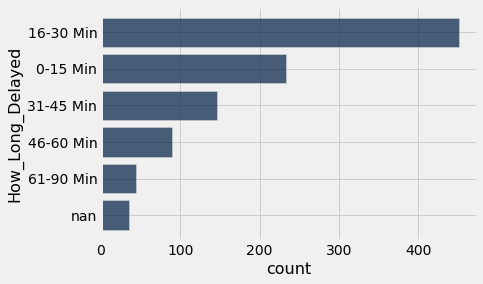

In [ ]:
#bb10_100.group('How_Long_Delayed')
bb10_100.group('How_Long_Delayed').sort('count', descending=True).barh('How_Long_Delayed')

In [ ]:
bb10_100.group(['Bus_Company_Name']).sort('count', descending=True).show(15)
#bb10_100.group(['Bus_Company_Name']).sort('count', descending=True).barh('Bus_Company_Name') 

Bus_Company_Name,count
VAN TRANS LLC (B2192),206
PIONEER TRANSPORTATION CORP,181
L & M BUS CORP.,117
"G.V.C., LTD.",103
PRIDE TRANSPORTATION (SCH AGE),63
ALLIED TRANSIT CORP.,54
CAREFUL BUS SERVICE INC (B2192),39
CAREFUL BUS,38
"DON THOMAS BUSES, INC.",25
SNT BUS INC,24


### Route Number X349 has the highest delays followed by K774

In [ ]:
bb10_100.group(['Route_Number']).sort('count', descending=True).show(15)

Route_Number,count
X349,25
K774,21
X357,19
X027,19
Q2906,18
5,16
X2125,15
K971,15
K970,14
K145,13


### Bus Number 74630 has a lot of problems.

In [ ]:
bb10_100.group(['Bus_No']).sort('count', descending=True).show(5)

Bus_No,count
74630,24
50,21
74604,19
663,15
300,15


### End of Group Analysis 

In [ ]:
#Requires modification. It does not return the right values 
#as the date is in MM/DD/YYYY format & not DD/MM/YYYY
#Concatenation problem


# def month_count(tab1):
#   number_of_cases_that_month = []
#   m = make_array('01', '02', '03', '04',
#                  '05', '06', '07', '08', 
#                  '09', '10', '11', '12')
#   for i in m:    
#     count = tab1.where('Occurred_On', are.containing(str(i) + str()+ '/2021')).num_rows
#     np.append(number_of_cases_that_month, count)
#     print(count)
#     #return (number_of_cases_that_month)
